In [1]:
import random

# gestion des matrices, maths 
import numpy as np

# gestion de jeux de données
import pandas as pd

# affichage / création de graphes
import matplotlib.pyplot as plt
import seaborn as sns

# Outil d'évaluation de modèle
from sklearn.metrics import confusion_matrix 

# keras = librarie de Deep Learning / construction de réseaux de neurones
import keras 
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.models import Sequential

Using TensorFlow backend.


# Chargement des données

In [2]:
file_path = "data.csv"

#chargement des données depuis notre fichier csv
dataset = pd.read_csv(file_path)

#affichage des premiere ligne de notre dataset
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Etude exploratoire des donnée  

In [3]:
dataset_len = len(dataset)
print("nombre de donnée : ", dataset_len)

nombre de donnée :  55000


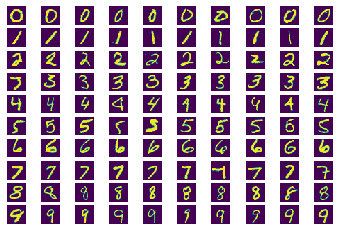

In [4]:
nb_value_plot = 10

# Créer un object pour gérer l'affichage de nos images
fig1, axes = plt.subplots(10, nb_value_plot)

for i in range(10): # 10 nombres
    # Sélectionne seulement les lignes du dataset correspondant au chiffre "i".
    # sample = récupère aléatoirement "nb_value_plot" lignes parmi la sélection
    # values[:,1:] = récupère les valeurs à partir de la 2ème. La première étant le label
    sample = dataset[dataset['label'] == i].sample(nb_value_plot).values[:,1:]
    num_plot=0
    for img in sample:
        # img correspond à un tableau de format (784,). Pour l'afficher en tant qu'image on le reshape en 28*28px
        image = img.reshape((28,28))
        axes[i, num_plot].imshow(image)
        axes[i, num_plot].axis('off')
        num_plot+=1

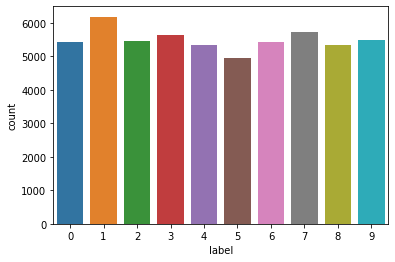

In [5]:
# Distribution des classes (des chiffres différents)
sns.countplot(dataset['label'])

In [6]:
# Print la valeur minimal et la valeur maximal existante dans la première image du dataset
print((min(dataset.values[:,1:][1]), max(dataset.values[:,1:][1])))

(0, 255)


In [7]:
dataset.isnull().sum().sum()

# il y a 0 valeurs nulles dans le dataset

0

# Séparation des jeux de données 

In [8]:
# On donne un ordre aléatoire aux données pour s'assurer qu'elle ne sont pas rangé par classes
dataset = dataset.sample(frac=1)

# On défini les proportions de chaque set
test_portion = 0.1
validation_portion = 0.2

In [9]:
# Calcul le nombre d'images par set
nb_test_data = int(0.1 * dataset_len)
nb_validation_data = int(0.2 * dataset_len)
nb_train_data = dataset_len - nb_validation_data - nb_test_data

print("données de training : ", nb_train_data)
print("données de validation : ", nb_validation_data)
print("données de test : ", nb_test_data)


# Sépare les données
dataset_train = dataset[:nb_train_data]
dataset_val = dataset[nb_train_data:nb_train_data+nb_validation_data]
dataset_test = dataset[-nb_test_data:]

print("\n\nOn vérifie que ce sont bien les mêmes nombres")
print("données de training : ", len(dataset_train))
print("données de validation : ", len(dataset_val))
print("données de test : ", len(dataset_test))

#séparation du label (Y) des données (X)
X_train = dataset_train.values[:,1:]
Y_train = dataset_train['label'].values

X_val = dataset_val.values[:,1:]
Y_val = dataset_val['label'].values

X_test = dataset_test.values[:,1:]
Y_test = dataset_test['label'].values

données de training :  38500
données de validation :  11000
données de test :  5500


On vérifie que ce sont bien les mêmes nombres
données de training :  38500
données de validation :  11000
données de test :  5500


# Préparation des données

In [10]:
# Les modèles que l'on va utiliser convergent plus facilement si les inputs sont entre 0 et 1 plutôt que 0 à 255
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /=255
X_test /=255

In [11]:
# Il faut aussi modifié le "Y" passant d'un chiffre à un array de 0 et 1 : one hot encoding

print("avant :", Y_train[0])

Y_train = keras.utils.to_categorical(Y_train, 10)
Y_val = keras.utils.to_categorical(Y_val, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

print("après : ", Y_train[0])

avant : 9
après :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Modélisation d'un modèle simple

## Définition du modèle 

#### Vous pouvez jouer sur ces paramètres :
- nombre de couches
- type de couches
- batch
- epochs
- type d'activation
- nombre d'activation (neurones)

Voici la documentation : https://keras.io/

In [12]:
# créer un object "model" de type "Sequential"
model = Sequential()

# Ajoute une couche de type "Dense" de 1 neurone. 
# L'activation utilisé pour cette couche est de type "sigmoid".
# Etant la première couche du modèle il faut aussi lui préciser la "shape" qu'elle va recevoir en input.
model.add(Dense(1, activation='sigmoid', name = "Hidden_Layer_1", input_shape = (784,)))

# Nous utilisons softmax pour choisir le chiffre "gagnant" et connaître sa probabilité
# La somme des 10 chiffres en sortie du softmax = 1. On à donc une probabilité pour chaque chiffre.
model.add(Dense(10, activation='softmax', name = "Output_Layer"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
# On "compile" ce qui configure le model et le prépare à l'entrainement. Nous devons choisir : 
#  - l'optimizer : fait le lien entre la loss et la mise à jour des poids du modèle
#  - loss : comment on calcul l'erreur. Ici "categorical_crossentropy" car nous avons 10 catégories différentes à classer
#  - metrics : ce qui sera affiché lors de l'entraînement

model.compile(optimizer = "sgd" , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 1)                 785       
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


##  Apprentissage

In [14]:
# Définition de certains paramètres importants pour l'entraînement

# float entre 0 et 1, la majorité du temps entre 0.001 et 0.1.
# Défini la vitesse de modification des poids du réseaux de neurones
learning_rate = 0.1 

# Nombre de fois que le modèle va voir toute les données d'apprentissage
training_epochs = 2

# Nombre de données envoyées au modèle lors de l'entraînement avant la backpropagation
batch_size = 1

In [15]:
# l'entraînement est déclenché avec l'appel de la fonction "fit".
# on lui envoie les données, les réponse (Y_train) ainsi que les variables choisies au dessus
# verbose : niveau d'information qui sera écrit pendant l'entraînement
# Pendant l'entraînement on pourra aussi voir si le modèle over-fit ou pas avec la validation_data

history = model.fit(X_train, Y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 1,
                     validation_data=(X_val, Y_val))


Train on 38500 samples, validate on 11000 samples
Epoch 1/2
38500/38500 [==============================] - 44s 1ms/step - loss: 1.8975 - accuracy: 0.2076 - val_loss: 1.7860 - val_accuracy: 0.2030
Epoch 2/2
38500/38500 [==============================] - 42s 1ms/step - loss: 1.7733 - accuracy: 0.2141 - val_loss: 1.7674 - val_accuracy: 0.2183


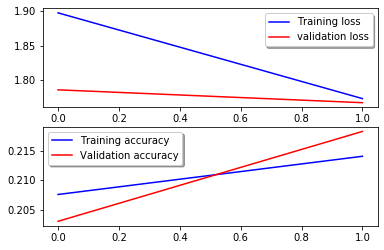

In [16]:
# ici on affiche history (ce qui est retourné par model.fit) .history['loss'] et 'val_loss' 
# pour avoir une vision plus graphique de leur évolution

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Pareil pour l'accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# ces plots nous permettent aussi de vérifier s'il y a eu de l'over ou under fitting

In [17]:
# Si vous voulez que votre nouveau modèle soit pris en compte par l'api, il faut le sauvegarder
model.save("model.h5")

# Test du modèle

## Affichage de quelques résultats

In [ ]:
#model = load_model('model.h5')

In [18]:
# Prédit sur les données du dataset de validation
Y_pred = model.predict(X_val)

# Récupère le chiffre avec la plus grande probabilité pour chaque prédiction
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
print('2ème étape :',Y_pred[0], ' --> ', Y_pred_classes[0],'\n')

# Change Y_val de "one hot vectors" vers un chiffre unique
Y_true = np.argmax(Y_val,axis = 1) 
print('3ème étape :',Y_val[0],' --> ',Y_true[0])

2ème étape : [0.15328395 0.21583572 0.16103745 0.15661666 0.0017379  0.14372611
 0.01358069 0.00682265 0.14250177 0.00485714]  -->  1 

3ème étape : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  -->  0


### Quelques erreurs

In [19]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            ax[row,col].axis('off')
            n += 1
    plt.subplots_adjust(hspace = 0.5)

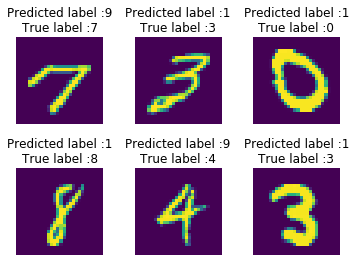

In [20]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

get_random = [random.randrange(0, len(X_val_errors)) for i in range(6)]

display_errors(get_random, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## Matrice de confusion 

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))